# Regression


### Logistic Regression

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
Accuracy: 0.5885
Precision: 0.3529
Recall: 0.1739
F1 Score: 0.2330


<Figure size 800x600 with 0 Axes>

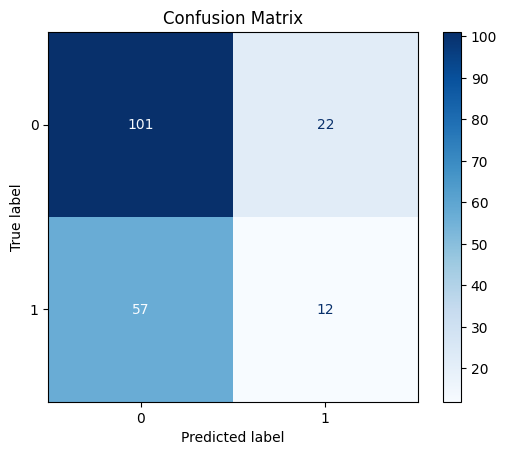

Mean Squared Error (MSE): 0.2383
Root Mean Squared Error (RMSE): 0.4881


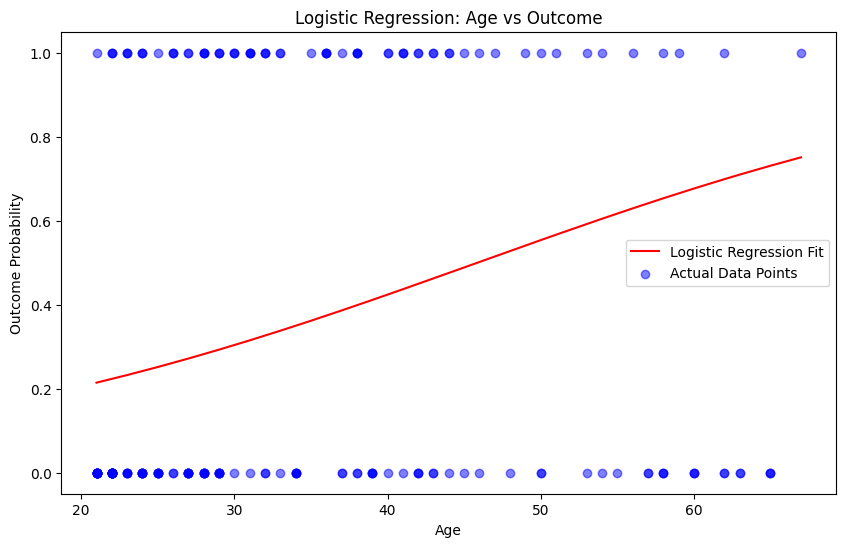

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import mean_squared_error

# Load the dataset
data = pd.read_csv('diabetes_csv.csv')

# Display the first few rows of the data to understand it
print(data.head())

# Select 'Age' as the feature (X) and 'Outcome' as the target (y)
X = data[['Age']]  # Using double brackets to keep X as a DataFrame
y = data['Outcome']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, shuffle=True)

# Train a logistic regression model using only 'Age' as the predictor
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict the outcomes for the test set
y_pred = model.predict(X_test)

# Predict the probabilities for the test set
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Predicted probabilities for the positive class

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Calculate precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")

# Calculate recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.4f}")

# Calculate F1-score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.4f}")

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix')
plt.show()

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred_proba)
print(f"Mean Squared Error (MSE): {mse:.4f}")

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

# Sort values for a smooth line plot
X_test_sorted, y_pred_proba_sorted = zip(*sorted(zip(X_test['Age'], y_pred_proba)))

# Plotting Age vs Outcome using logistic regression probabilities
plt.figure(figsize=(10, 6))
plt.plot(X_test_sorted, y_pred_proba_sorted, color='red', label='Logistic Regression Fit')
plt.scatter(X_test['Age'], y_test, color='blue', alpha=0.5, label='Actual Data Points')
plt.xlabel('Age')
plt.ylabel('Outcome Probability')
plt.title('Logistic Regression: Age vs Outcome')
plt.legend()
plt.show()


### Linear Regression

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
Mean Squared Error (MSE): 0.2362
Root Mean Squared Error (RMSE): 0.4860
R-squared (R2): -0.0258


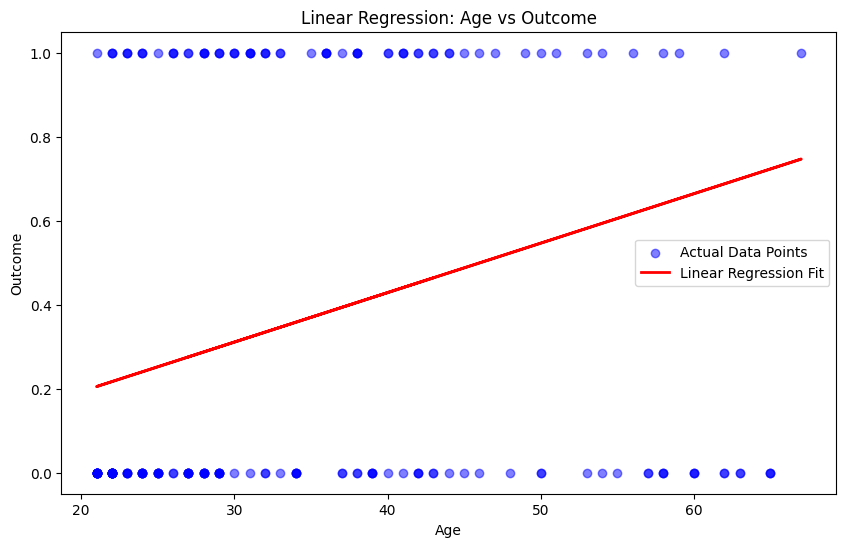

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv('diabetes_csv.csv')

# Display the first few rows of the data to understand it
print(data.head())

# Select 'Age' as the feature (X) and 'Outcome' as the target (y)
X = data[['Age']]  # Using double brackets to keep X as a DataFrame
y = data['Outcome']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, shuffle=True)

# Train a linear regression model using only 'Age' as the predictor
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the outcomes for the test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.4f}")

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

# Calculate R-squared (R2) score
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2): {r2:.4f}")

# Plotting Age vs Outcome using linear regression line
plt.figure(figsize=(10, 6))
plt.scatter(X_test['Age'], y_test, color='blue', alpha=0.5, label='Actual Data Points')
plt.plot(X_test['Age'], y_pred, color='red', linewidth=2, label='Linear Regression Fit')
plt.xlabel('Age')
plt.ylabel('Outcome')
plt.title('Linear Regression: Age vs Outcome')
plt.legend()
plt.show()


# SGD

### SGD w/ Linear Regression


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
Mean Squared Error (MSE): 0.3848
Root Mean Squared Error (RMSE): 0.6204
R-squared (R2): -0.6716


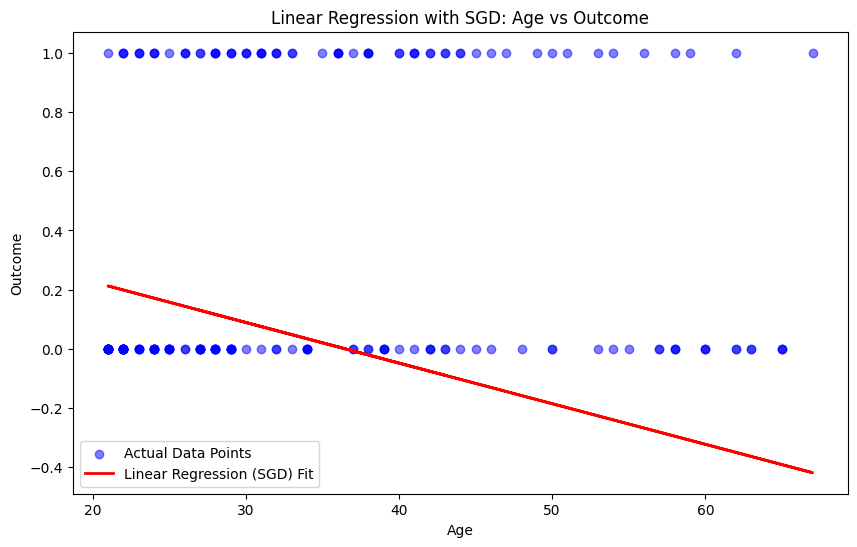

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv('diabetes_csv.csv')

# Display the first few rows of the data to understand it
print(data.head())

# Select 'Age' as the feature (X) and 'Outcome' as the target (y)
X = data[['Age']]  # Using double brackets to keep X as a DataFrame
y = data['Outcome']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, shuffle=True)

# Train a linear regression model using SGD
model = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)
model.fit(X_train, y_train)

# Predict the outcomes for the test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.4f}")

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

# Calculate R-squared (R2) score
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2): {r2:.4f}")

# Plotting Age vs Outcome using linear regression line
plt.figure(figsize=(10, 6))
plt.scatter(X_test['Age'], y_test, color='blue', alpha=0.5, label='Actual Data Points')
plt.plot(X_test['Age'], y_pred, color='red', linewidth=2, label='Linear Regression (SGD) Fit')
plt.xlabel('Age')
plt.ylabel('Outcome')
plt.title('Linear Regression with SGD: Age vs Outcome')
plt.legend()
plt.show()


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

data = pd.read_csv('heights.csv')
X = data['mother_height'].values
y = data['daughter_height'].values

In [7]:
def gradient_descent(X,y,learning_rate = 0.0001, epochs = 24):
    m = 0
    c = 0
    n = float(len(X))
    error_list = []
    
    for i in range(epochs):
        y_pred = m*X + c
        
        D_m = (-2/n)*sum(X*(y-y_pred))
        D_c = (-2/n)*sum(y-y_pred)
        
        m = m - learning_rate * D_m
        c = c - learning_rate * D_c
        
        mse = np.mean((y-y_pred)**2)
        error_list.append(mse)
    return m,c,error_list

m,c,error_list = gradient_descent(X,y)
print(f"slope : m = {m:.4f}, intercept : c = {c:.4f}")

slope : m = 1.0286, intercept : c = 0.0149


In [11]:
Y_pred = m*X + c
mse = np.mean((y-Y_pred)**2)
rmse = np.sqrt(mse)

print(f"rmse: {rmse:}")
print(f"mse: {mse:}")


rmse: 0.16470126790106096
mse: 0.02712650764821705


In [10]:
mother_height_new = 63

# Prediction using Gradient Descent model
daughter_height_gd = m * mother_height_new + c
print(f"Predicted Daughter's Height (Gradient Descent) for Mother Height {mother_height_new}: {daughter_height_gd:.2f}")


Predicted Daughter's Height (Gradient Descent) for Mother Height 63: 64.81


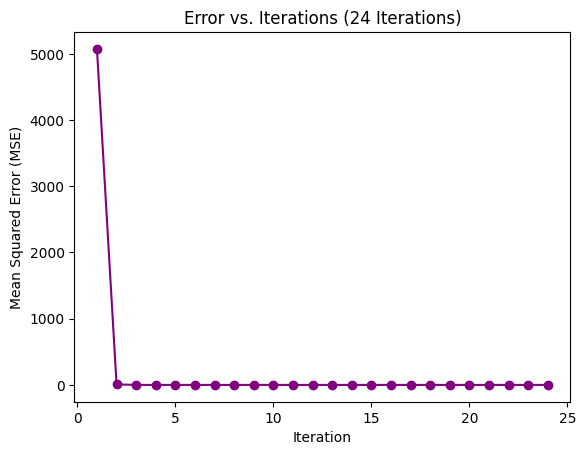

In [9]:
# Plotting Error vs. Iterations
plt.plot(range(1, 25), error_list, marker='o', color='purple')
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Error vs. Iterations (24 Iterations)')
plt.show()


### SGD w/ Logistic Regression

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
Accuracy: 0.3594
Precision: 0.3594
Recall: 1.0000
F1 Score: 0.5287


<Figure size 800x600 with 0 Axes>

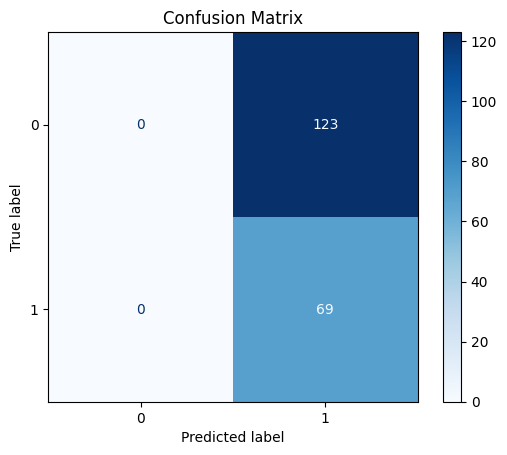

Mean Squared Error (MSE): 523140.6782
Root Mean Squared Error (RMSE): 723.2846


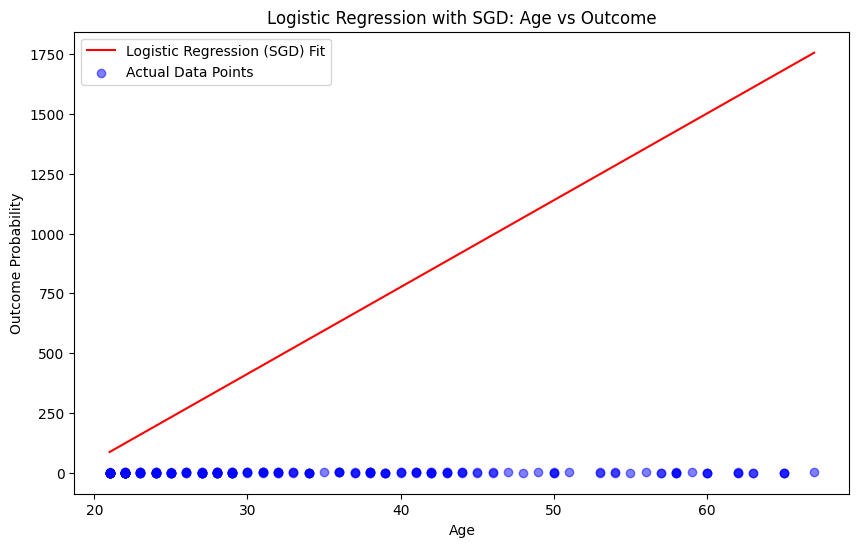

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import mean_squared_error

# Load the dataset
data = pd.read_csv('diabetes_csv.csv')

# Display the first few rows of the data to understand it
print(data.head())

# Select 'Age' as the feature (X) and 'Outcome' as the target (y)
X = data[['Age']]  # Using double brackets to keep X as a DataFrame
y = data['Outcome']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, shuffle=True)

# Train a logistic regression model using SGD
model = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42, loss='log_loss')
model.fit(X_train, y_train)

# Predict the outcomes for the test set
y_pred = model.predict(X_test)

# Predict the probabilities for the test set using the decision function
y_pred_proba = model.decision_function(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Calculate precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")

# Calculate recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.4f}")

# Calculate F1-score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.4f}")

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix')
plt.show()

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred_proba)
print(f"Mean Squared Error (MSE): {mse:.4f}")

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

# Sort values for a smooth line plot
X_test_sorted, y_pred_proba_sorted = zip(*sorted(zip(X_test['Age'], y_pred_proba)))

# Plotting Age vs Outcome using logistic regression probabilities
plt.figure(figsize=(10, 6))
plt.plot(X_test_sorted, y_pred_proba_sorted, color='red', label='Logistic Regression (SGD) Fit')
plt.scatter(X_test['Age'], y_test, color='blue', alpha=0.5, label='Actual Data Points')
plt.xlabel('Age')
plt.ylabel('Outcome Probability')
plt.title('Logistic Regression with SGD: Age vs Outcome')
plt.legend()
plt.show()


# Naive Bayes Classifier